# Lista 4

In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

## zadanie 3

In [20]:
def sampleACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

In [17]:
def sampleACF(X, h):
    return sampleACVF(X, h)/sampleACVF(X, 0)

In [19]:
def teoACVF(h):
    return 4 if h==0 else 0

In [18]:
def teoACF(h):
    return 1 if h==0 else 0

In [21]:
def zad3(n,h):
    X = np.random.normal(0, 2, size = n)
    return n,h,sampleACVF(X, h), sampleACF(X, h)

In [29]:
wyniki = []
for h in list(range(-50,51)):
    for n in [1000, 10000]:
        n, h, acvf, acf = zad3(n, h)
        wyniki.append([n, h, acvf, teoACVF(h), acf, teoACF(h)])
        
df = pd.DataFrame(wyniki, columns = ['n', 'h', 'sampleACVF', 'True ACVF', 'sampleACF', 'True ACF'])
df

,n,h,sampleACVF,True ACVF,sampleACF,True ACF
0,1000,-50,0.143643,0,0.036104,0
1,10000,-50,0.028747,0,0.007214,0
2,1000,-49,-0.224969,0,-0.054344,0
3,10000,-49,-0.026188,0,-0.006591,0
4,1000,-48,-0.005706,0,-0.001465,0
...,...,...,...,...,...,...
197,10000,48,0.004640,0,0.001177,0
198,1000,49,-0.033454,0,-0.008184,0
199,10000,49,-0.006799,0,-0.001690,0
200,1000,50,0.108942,0,0.028813,0


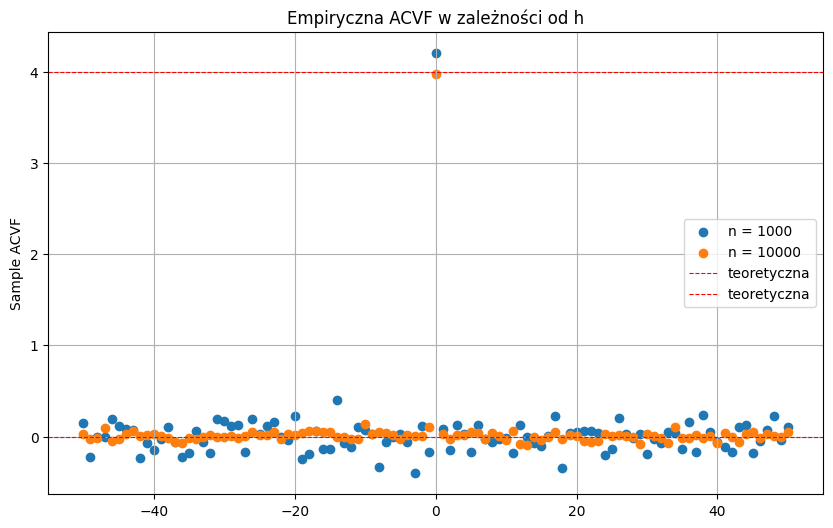

In [33]:
plt.figure(figsize=(10, 6))
for n in sorted(df['n'].unique()):
    subset = df[df['n'] == n]
    plt.scatter(subset['h'], subset['sampleACVF'], marker='o', label=f'n = {n}')

plt.axhline(0, color='red', linestyle='dashed', linewidth=0.8, label = 'teoretyczna')  # Linia dla ACVF = 0
plt.axhline(4, color='red', linestyle='dashed', linewidth=0.8, label = 'teoretyczna')  # Linia dla ACVF = 4
plt.ylabel('Sample ACVF')
plt.title('Empiryczna ACVF w zależności od h')
plt.legend()
plt.grid()
plt.show()

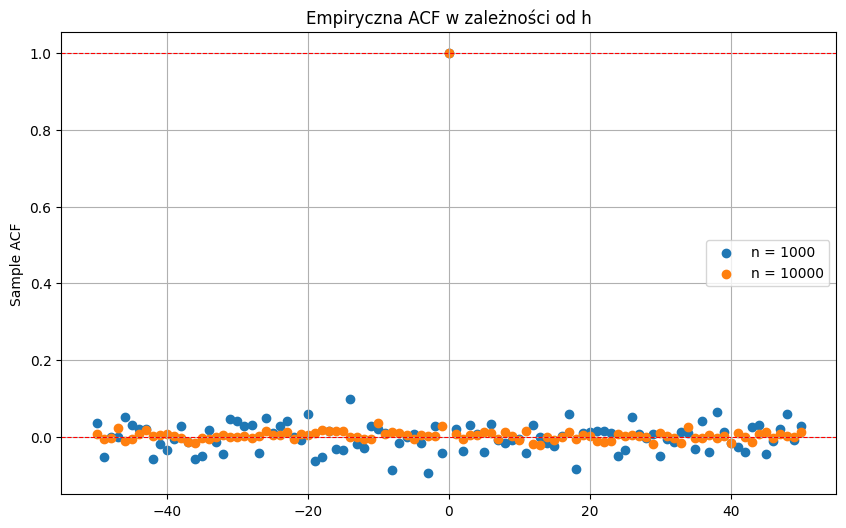

In [32]:
plt.figure(figsize=(10, 6))
for n in sorted(df['n'].unique()):
    subset = df[df['n'] == n]
    plt.scatter(subset['h'], subset['sampleACF'], marker='o', label=f'n = {n}')
    plt.scatter(subset['h'], subset['True ACF'], color = 'r', alpha= 0.5, marker='*')

plt.axhline(0, color='red', linestyle='dashed', linewidth=0.8)  # Linia dla ACVF = 0
plt.axhline(1, color='red', linestyle='dashed', linewidth=0.8)  # Linia dla ACVF = 2
plt.ylabel('Sample ACF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()

## zadanie 4

In [59]:
def ma1teoACVF(h, sigma, theta):
    if h == 0:
        return sigma**2*(1+theta**2)
    if abs(h) == 1:
        return theta*sigma**2
    else:
        return 0

In [9]:
def ma1teoACF(h, theta):
    if h == 0:
        return 1
    if abs(h) == 1:
        return theta/(1+theta**2)
    else:
        return 0

In [49]:
def zad4(n, h, sigma, theta):
    Z = np.random.normal(0, sigma**2, size = n+1)
    X = Z[1:] + theta*Z[:-1]
    empACF = sampleACF(X, h)
    trueACF = ma1teoACF(h, theta)
    return n,h,sampleACVF(X,h),ma1teoACVF(h, sigma, theta), empACF,trueACF
    

In [60]:
sigma = 1
theta = 2
wyniki2 = []
for h in list(range(-50,51)):
    for n in [1000, 10000]:
        wyniki2.append(zad4(n,h, sigma, theta))
        
df2 = pd.DataFrame(wyniki2, columns = ['n', 'h', 'sampleACVF','True ACVF', 'sampleACF', 'True ACF'])


In [61]:
df2

,n,h,sampleACVF,True ACVF,sampleACF,True ACF
0,1000,-50,-0.233592,0,-0.046651,0.0
1,10000,-50,-0.068406,0,-0.013391,0.0
2,1000,-49,0.103804,0,0.021296,0.0
3,10000,-49,0.034347,0,0.006804,0.0
4,1000,-48,0.015101,0,0.002891,0.0
...,...,...,...,...,...,...
197,10000,48,0.002107,0,0.000419,0.0
198,1000,49,-0.208678,0,-0.040815,0.0
199,10000,49,-0.018605,0,-0.003738,0.0
200,1000,50,0.260859,0,0.049365,0.0


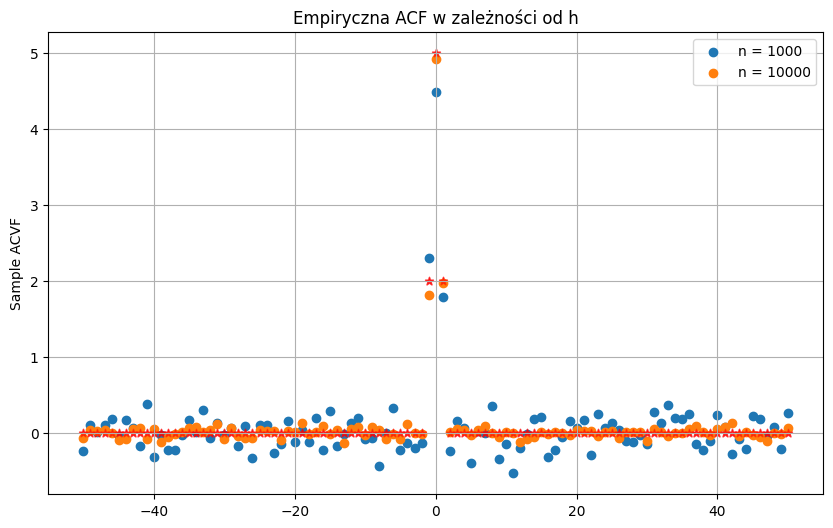

In [73]:
plt.figure(figsize=(10, 6))
for n in sorted(df2['n'].unique()):
    subset = df2[df['n'] == n]
    plt.scatter(subset['h'], subset['sampleACVF'], marker='o', label=f'n = {n}')
    plt.scatter(subset['h'], subset['True ACVF'], color = 'r', alpha= 0.5, marker='*')
# acfs = df2['True ACVF'].unique()
# for value in acfs:
#     plt.axhline(y=value, color='r', linestyle='--', alpha=0.7, label=f'True ACVF={value}')

plt.ylabel('Sample ACVF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()

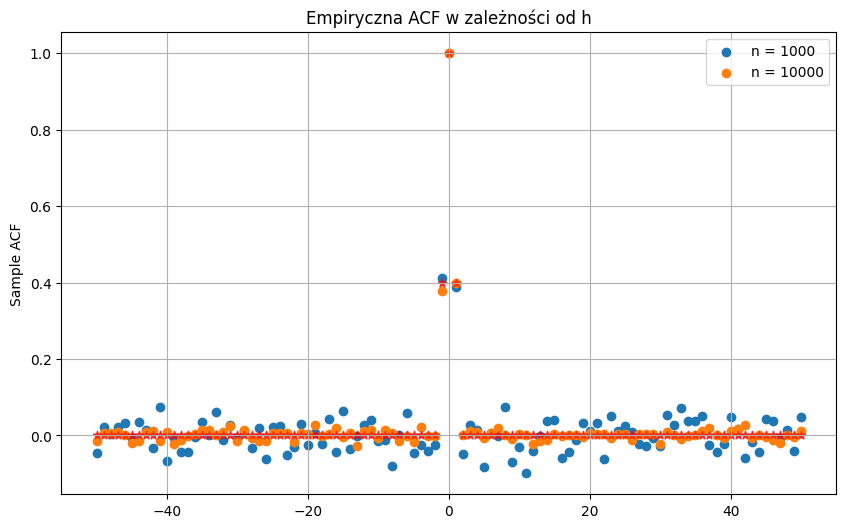

In [72]:
plt.figure(figsize=(10, 6))
for n in sorted(df2['n'].unique()):
    subset = df2[df['n'] == n]
    plt.scatter(subset['h'], subset['sampleACF'], marker='o', label=f'n = {n}')
    plt.scatter(subset['h'], subset['True ACF'], color = 'r', alpha= 0.5, marker='*')
# acfs = df2['True ACF'].unique()
# for value in acfs:
#     plt.axhline(y=value, color='r', linestyle='--', alpha=0.7, label=f'True ACF={value}')

plt.ylabel('Sample ACF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()